In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from matplotlib.pyplot import figure

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical

In [ ]:
(train_img, train_label), (test_img, test_label) = cifar10.load_data()

In [ ]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_img.shape, train_label.shape))
print('Test: X=%s, y=%s' % (test_img.shape, test_label.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
train_imgr = train_img.reshape(train_img.shape[0], train_img.shape[1] * train_img.shape[2]*train_img.shape[3])
train_labelr = train_label.reshape(train_label.shape[0]*train_label.shape[1])

In [ ]:
train_imgr.shape , train_labelr.shape

((50000, 3072), (50000,))

In [ ]:
test_imgr = test_img.reshape(test_img.shape[0], test_img.shape[1] * test_img.shape[2]*test_img.shape[3])
test_labelr = test_label.reshape(test_label.shape[0]*test_label.shape[1])

In [ ]:
test_imgr.shape

(10000, 3072)

In [ ]:
cifar_train_df = pd.DataFrame({"labels":list(train_labelr),"images":list(train_imgr)})
cifar_test_df = pd.DataFrame({"labels":list(test_labelr),"images":list(test_imgr)})

In [ ]:
cifar_train_df

,labels,images
0,6,"[59, 62, 63, 43, 46, 45, 50, 48, 43, 68, 54, 4..."
1,9,"[154, 177, 187, 126, 137, 136, 105, 104, 95, 1..."
2,9,"[255, 255, 255, 253, 253, 253, 253, 253, 253, ..."
3,4,"[28, 25, 10, 37, 34, 19, 38, 35, 20, 42, 37, 2..."
4,1,"[170, 180, 198, 168, 178, 196, 177, 185, 203, ..."
...,...,...
49995,2,"[145, 161, 194, 151, 166, 199, 156, 171, 205, ..."
49996,6,"[255, 245, 132, 254, 247, 134, 255, 249, 137, ..."
49997,9,"[35, 178, 235, 40, 176, 239, 42, 176, 241, 39,..."
49998,1,"[189, 211, 240, 186, 208, 236, 185, 207, 235, ..."


In [ ]:
cifar_train_finaldf = cifar_train_df[cifar_train_df['labels'].isin(['5', '6','7','8','9']) ]
cifar_train_finaldf = cifar_train_finaldf.replace({'labels': {5: 0, 6: 1,7:2,8:3,9:4}})
cifar_test_finaldf = cifar_test_df[cifar_test_df['labels'].isin(['5', '6','7','8','9']) ]
cifar_test_finaldf = cifar_test_finaldf.replace({'labels': {5: 0, 6: 1,7:2,8:3,9:4}})

In [ ]:
cifar_test_finaldf

,labels,images
1,3,"[235, 235, 235, 231, 231, 231, 232, 232, 232, ..."
2,3,"[158, 190, 222, 158, 187, 218, 139, 166, 194, ..."
4,1,"[65, 68, 50, 70, 81, 64, 48, 64, 46, 30, 46, 3..."
5,1,"[179, 118, 83, 139, 96, 61, 77, 49, 26, 88, 59..."
7,1,"[83, 94, 85, 82, 94, 84, 81, 93, 83, 77, 89, 7..."
...,...,...
9990,2,"[84, 120, 98, 98, 125, 103, 99, 125, 105, 100,..."
9993,0,"[95, 98, 92, 93, 92, 90, 96, 89, 92, 92, 84, 8..."
9995,3,"[76, 78, 133, 76, 78, 134, 77, 80, 132, 76, 81..."
9997,0,"[20, 15, 12, 19, 14, 11, 15, 14, 11, 15, 14, 1..."


In [ ]:
train_x = list(cifar_train_finaldf["images"].values)
train_y = list(cifar_train_finaldf["labels"].values)

test_x = list(cifar_test_finaldf["images"].values)
test_y = list(cifar_test_finaldf["labels"].values)

In [ ]:
len(train_y)

25000

In [ ]:
train_labels = to_categorical(train_y, dtype='int16',num_classes=5)
test_labels = to_categorical(test_y, dtype='int16',num_classes=5)

In [ ]:
train_labels

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1]], dtype=int16)

In [ ]:
# convert from integers to floats
train_norm = np.array(train_x, dtype=np.float32)
test_norm =  np.array(test_x, dtype=np.float32)

train_images = np.array(train_norm) / 255.0
test_images = np.array(test_norm) / 255.0


Classes--> 
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck 

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu,input_shape = (3072,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 325       
Total params: 434,949
Trainable params: 434,949
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs=500,callbacks=[callback])

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\n Test accuracy:', test_acc)

157/157 [==============================] - 0s 2ms/step - loss: 1.3220 - accuracy: 0.6916

 Test accuracy: 0.6916000247001648


In [ ]:
test_labels_pred = model.predict(test_images)

In [ ]:
test_labels_pred

array([[3.31101073e-05, 2.44947373e-09, 1.28680118e-03, 7.51400650e-01,
        2.47279510e-01],
       [2.56702420e-04, 5.03993181e-10, 8.58082622e-03, 9.64718580e-01,
        2.64438279e-02],
       [4.09935653e-01, 5.89877367e-01, 1.71859589e-04, 1.21712155e-05,
        2.96453231e-06],
       ...,
       [8.82165909e-01, 5.68311382e-03, 1.92969888e-02, 9.22989100e-02,
        5.55154926e-04],
       [9.99628305e-01, 3.14103345e-05, 3.40160535e-04, 1.24248265e-08,
        3.20557731e-08],
       [4.75392351e-03, 4.18311730e-03, 9.91040885e-01, 8.15316344e-06,
        1.39179438e-05]], dtype=float32)

In [ ]:
pred_test_labels_new = np.argmax(model.predict(test_images),axis=1)

In [ ]:
pred_test_labels_new

array([3, 3, 1, ..., 0, 0, 2])

In [ ]:
test_labels_new = np.argmax(test_labels,axis=1)

In [ ]:
conf_mat = np.zeros((5,5))
for i in range(len(test_labels_new)):
  conf_mat[test_labels_new[i]][pred_test_labels_new[i]] += 1

In [ ]:
conf_mat

array([[636., 133., 139.,  53.,  39.],
       [177., 684.,  79.,  26.,  34.],
       [156.,  42., 704.,  27.,  71.],
       [ 51.,  24.,  60., 744., 121.],
       [ 51.,  43.,  89., 127., 690.]])

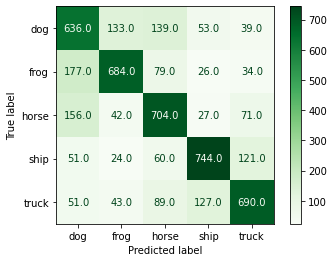

In [ ]:
cifar_cm = ConfusionMatrixDisplay(conf_mat,display_labels=['dog','frog','horse','ship','truck']).plot(values_format=".1f",cmap='Greens')
cifar_cm.figure_figsize = (10,15)